# Ejercicio 9: Descripción del sonido y la música

Con este ejercicio aprenderá a describir sonidos con métodos simples de aprendizaje automático. Aprenderá a utilizar la API de Freesound para cargar descriptores de sonido precalculados de Freesound y realizar agrupaciones y clasificaciones de sonido con ellos. Trabajarás con sonidos instrumentales, aprendiendo así qué funciones de audio son útiles para caracterizarlos.

Hay cuatro partes en este ejercicio: 
1) Descargar sonidos y descriptores de Freesound 
2) Seleccionar dos descriptores para un buen agrupamiento de sonidos
3) Agrupar sonidos usando k-means y 
4) Clasificar sonidos usando k-NN.

Proporcionamos el código para cada tarea, por lo que no es necesario involucrarse en mucha programación.

### Conceptos relevantes

#### API de sonido libre
Con la API de Freesound, usted puede navegar, buscar y recuperar información de Freesound, como funciones extraídas automáticamente de archivos de audio. También puede realizar consultas avanzadas combinando funciones de análisis de contenido y otros metadatos (etiquetas, etc...). Con la API puedes hacer búsquedas de texto similares a las que puedes hacer desde las búsquedas avanzadas en el sitio web http://freesound.org/search/?q, pero implementando las consultas en software. Si está interesado en saber más sobre la API de Freesound, puede ver ejemplos de su uso con python en: https://github.com/MTG/freesound-python/blob/master/examples.py y puede leer la API documentación, http://www.freesound.org/docs/api/

#### Descriptores de sonido
En este ejercicio, utilizará descriptores de sonido que se calcularon previamente con Essentia, https://essentia.upf.edu y se almacenan en la base de datos de Freesound junto con los sonidos correspondientes. Se pueden extraer muchos descriptores de sonido utilizando Essentia (http://essentia.upf.edu/documentation/algorithms_reference.html) y en Freesound se utilizan varios de ellos. En la documentación de la API de Freesound hay información específca de los descriptores disponibles en Freesound, https://freesound.org/docs/api/analysis_index.html.

### Distancia euclidiana
La distancia euclidiana es la distancia en línea recta entre dos puntos en un espacio n-dimensional, por lo que la distancia entre los puntos $p$ y $q$ es la longitud del segmento de línea que los conecta. Si $p = (p_1, p_2,..., p_n)$ y $q = (q_1, q_2,..., q_n)$ son dos puntos en el espacio n euclidiano, entonces la distancia, $d$, desde $p$ a $q$, o de $q$ a $p$ está dada por la fórmula de Pitágoras:

$ d(p,q) = \sqrt{\sum^n_{i=1} (q_i - p_i)^2} $


### Agrupamiento de k-medias (k-medias)
El agrupamiento de K-means es un método de cuantificación de vectores que es popular para el análisis de conglomerados en la minería de datos. El agrupamiento de K-means tiene como objetivo dividir $n$ observaciones en $k$ conglomerados en los que cada observación pertenece al conglomerado con la media más cercana, sirviendo como un prototipo del conglomerado. El problema es computacionalmente difícil (NP-difícil), sin embargo, los algoritmos heurísticos eficientes convergen rápidamente a un óptimo local.

Dado un conjunto de observaciones $(x_1, x_2, …, x_n)$, donde cada observación es un vector real de dimensión d, el agrupamiento de k-means tiene como objetivo dividir las $n$ observaciones en $k (≤ n)$ conjuntos $ S = {S_1, S_2, …, S_k}$ para minimizar la suma de cuadrados dentro del grupo (WCSS) (es decir, la varianza). Formalmente, el objetivo es encontrar:

$\underset{\mathbf{S}} {\operatorname{arg\,min}} \sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \underset{\mathbf{S}} {\operatorname{arg\,min}} \sum_{i=1}^k |S_i| \operatorname{Var} S_i$, donde $μ_i$ es la media de puntos en $S_i$.

### K-clasificador de vecinos más cercanos (k-NN)
La clasificación de K-vecinos más cercanos (k-NN) es un método no paramétrico en el que la entrada consiste en los $k$ ejemplos de entrenamiento más cercanos en el espacio de características. La salida es una pertenencia a una clase. Un objeto se clasifica por una pluralidad de votos de sus vecinos, y el objeto se asigna a la clase más común entre sus $k$ vecinos más cercanos ($k$ es un número entero positivo, normalmente pequeño). Si $k = 1$, entonces el objeto simplemente se asigna a la clase de ese vecino más cercano.


## Parte 1: Descargar sonidos y descriptores de Freesound

Descargue una colección de sonidos instrumentales y sus descriptores de Freesound utilizando la API de Freesound.

Primero obtenga una clave API de Freesound de http://www.freesound.org/apiv2/apply/ y cree un directorio en el espacio de trabajo con el nombre `testDownload` para almacenar los sonidos y descriptores. También necesita instalar el cliente Python para la API de Freesound. Haga esto clonando el repositorio https://github.com/MTG/freesound-python, en una carpeta e instalándolo siguiendo las instrucciones. Tendrás que importar el módulo freesound en el código.

Llamarás a la función `download_sounds_freesound()` cuyos parámetros de entrada son:
1. `queryText` (string): una sola palabra o una cadena de palabras sin espacios (utilice guiones), normalmente el nombre del instrumento. p.ej. (por ejemplo, "violín", "trompeta", "violonchelo", "fagot", etc.)
2. `tag` (string): etiqueta que se utilizará para filtrar los sonidos buscados (por ejemplo, "multimuestra", "nota única", "velocidad", "tenuto", etc.).
3. `duration` (2 números de punto flotante): duración mínima y máxima (segundos) del sonido a filtrar, por ejemplo, (0.2,15).
4. `API_Key` (string): su clave API.
5. `outputDir` (string): ruta al directorio donde desea almacenar los sonidos y sus descriptores.
6. `topNResults` (entero): número de resultados (sonidos) que desea descargar.
7. `featureExt` (extensión de archivo): extensión de archivo para almacenar el descriptor de sonido (.json, normalmente).

En la llamada a `download_sounds_freesound()`, tendrá que elegir el texto de consulta, la etiqueta y la duración apropiados para devolver notas individuales/golpes de sonidos instrumentales. Los primeros veinte resultados de la consulta deben ser "buenos". Tenga en cuenta que la etiqueta puede estar vacía. Un ejemplo de consulta para obtener notas sueltas de violín podría ser: `download_sounds_freesound(queryText='violin', API_Key=<your key>, outputDir='testDownload/', topNResults=20, duration=(0,8.5), tag='single-note')`. Esto devuelve 20 notas individuales de sonidos de violín y el script las almacena en el directorio `testDownload` (el directorio debe crearse de antemano).

Descargue y almacene veinte ejemplos de sonido de cada instrumento utilizando la función `download_sounds_freesound()` que se proporciona a continuación. Los ejemplos deben ser representativos del instrumento, notas individuales (instrumentos melódicos) o golpes individuales (instrumentos de percusión), y menos de 10 segundos. Especifique un buen texto de consulta, etiqueta y duración para consultar los instrumentos elegidos. Refina tus parámetros de búsqueda hasta que obtengas veinte buenas muestras para cada instrumento. Seleccione tres instrumentos para usar de este conjunto: violin, guitar, bassoon, trumpet, clarinet, cello, naobo (címbalos utilizados en la Ópera de Beijing). Escuche los sonidos descargados y mire los archivos .json del descriptor.

Antes de usar la API para descargar los sonidos, recomendamos hacer la misma consulta usando el sitio web de Freesound y verificar que los 20 mejores resultados sean buenos.

In [4]:
import os, sys
import json
sys.path.append('./freesound-python/') # directorio donde instaló el repositorio freesound-python
import freesound as fs

# Descriptores
descriptors = [ 'lowlevel.spectral_centroid.mean',
                'lowlevel.spectral_contrast.mean',
                'lowlevel.dissonance.mean',
                'lowlevel.hfc.mean',
                'lowlevel.mfcc.mean',
                'sfx.logattacktime.mean',
                'sfx.inharmonicity.mean']

In [5]:
def download_sounds_freesound(queryText = "", tag=None, duration=None, API_Key = "", outputDir = "", topNResults = 5, featureExt = '.json'):
  """
  This function downloads sounds and their descriptors from freesound using the queryText and the 
  tag specified in the input. Additionally, you can also specify the duration range to filter sounds 
  based on duration.
  
  Inputs:
        (Input parameters marked with a * are optional)
        queryText (string): query text for the sounds (eg. "violin", "trumpet", "cello", "bassoon" etc.)
        tag* (string): tag to be used for filtering the searched sounds. (eg. "multisample",  
                       "single-note" etc.)
        duration* (tuple): min and the max duration (seconds) of the sound to filter, eg. (0.2,15)
        API_Key (string): your api key, which you can obtain from : www.freesound.org/apiv2/apply/
        outputDir (string): path to the directory where you want to store the sounds and their 
                            descriptors
        topNResults (integer): number of results(sounds) that you want to download 
        featureExt (string): file extension for storing sound descriptors
  output:
        This function downloads sounds and descriptors, and then stores them in outputDir. In 
        outputDir it creates a directory of the same name as that of the queryText. In this 
        directory outputDir/queryText it creates a directory for every sound with the name 
        of the directory as the sound id. Additionally, this function also dumps a text file 
        containing sound-ids and freesound links for all the downloaded sounds in the outputDir. 
        NOTE: If the directory outputDir/queryText exists, it deletes the existing contents 
        and stores only the sounds from the current query. 
  """ 
  
  # Checking for the compulsory input parameters
  if queryText == "":
    print("\n")
    print("Provide a query text to search for sounds")
    return -1
    
  if API_Key == "":
    print("\n")
    print("You need a valid freesound API key to be able to download sounds.")
    print("Please apply for one here: www.freesound.org/apiv2/apply/")
    print("\n")
    return -1
    
  if outputDir == "" or not os.path.exists(outputDir):
    print("\n")
    print("Please provide a valid output directory. This will be the root directory for storing sounds and descriptors")
    return -1    
  
  # Setting up the Freesound client and the authentication key
  fsClnt = fs.FreesoundClient()
  fsClnt.set_token(API_Key,"token")  
  
  # Creating a duration filter string that the Freesound API understands
  if duration and type(duration) == tuple:
    flt_dur = " duration:[" + str(duration[0])+ " TO " +str(duration[1]) + "]"
  else:
    flt_dur = ""
 
  if tag and type(tag) == str:
    flt_tag = "tag:"+tag
  else:
    flt_tag = ""

  # Querying Freesound
  page_size = 30
  if not flt_tag + flt_dur == "":
    qRes = fsClnt.text_search(query=queryText ,filter = flt_tag + flt_dur,sort="score", fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  else:
    qRes = fsClnt.text_search(query=queryText ,sort="score",fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  
  outDir2 = os.path.join(outputDir, queryText)
  if os.path.exists(outDir2):             # If the directory exists, it deletes it and starts fresh
      os.rmdir(outDir2) # Se realizo un cambio       os.system("rm -r " + outDir2)
  os.mkdir(outDir2)

  pageNo = 1
  sndCnt = 0
  indCnt = 0
  totalSnds = min(qRes.count,200)   # System quits after trying to download after 200 times
  
  # Creating directories to store output and downloading sounds and their descriptors
  downloadedSounds = []
  while(1):
    if indCnt >= totalSnds:
      print("Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.")
      break
    sound = qRes[indCnt - ((pageNo-1)*page_size)]
    print("Downloading mp3 preview and descriptors for sound with id: %s"%str(sound.id))
    outDir1 = os.path.join(outputDir, queryText, str(sound.id))
    if os.path.exists(outDir1):
      os.system("rm -r " + outDir1)
    os.mkdir(outDir1)
    
    mp3Path = os.path.join(outDir1,  str(sound.previews.preview_lq_mp3.split("/")[-1]))
    ftrPath = mp3Path.replace('.mp3', featureExt)
    
    try:
      
      fs.FSRequest.retrieve(sound.previews.preview_lq_mp3, fsClnt, mp3Path)
      # Initialize a dictionary to store descriptors
      features = {}
      # Obtaining all the descriptors
      for desc in descriptors:
        features[desc]=[]
        features[desc].append(eval("sound.analysis."+desc))
      
      # Once we have all the descriptors, store them in a json file
      json.dump(features, open(ftrPath,'w'))
      sndCnt+=1
      downloadedSounds.append([str(sound.id), sound.url])

    except:
      if os.path.exists(outDir1):
        os.system("rm -r " + outDir1)
    
    indCnt +=1
    
    if indCnt%page_size==0:
      qRes = qRes.next_page()
      pageNo+=1
      
    if sndCnt>=topNResults:
      break
  # Dump the list of files and Freesound links
  fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
  for elem in downloadedSounds:
    fid.write('\t'.join(elem)+'\n')
  fid.close()

In [29]:
# llama a download_sounds_freesound para 3 instrumentos
## Descargue el primer sonido del instrumento y el descriptor (cambie las letras xx)
### outputDir='./testDownload'
### topNResults=20
### your code here
download_sounds_freesound(queryText = "violin", 
                          tag="pizzicato", 
                          duration = (0, 1.5), 
                          API_Key = '7nCLWEwrGhwsjWbZ0wDrAnMMCeyUwM7bj128cX3s', 
                          outputDir = './testDownload', 
                          topNResults = 20, 
                          featureExt = '.json')

In [27]:
## Descargue el segundo sonido del instrumento y el descriptor (cambie las letras xx)
### salidaDir='./testDownload'
### outputDir=20
### tu código aquí
download_sounds_freesound(queryText = 'cello', 
                          tag="single-note", 
                          duration=(1.5,3), 
                          API_Key = '7nCLWEwrGhwsjWbZ0wDrAnMMCeyUwM7bj128cX3s', 
                          outputDir = './testDownload', 
                          topNResults = 20, 
                          featureExt = '.json')

In [30]:
## Descargue el sonido del tercer instrumento y el descriptor (cambie las letras xx)
### outputDir='./testDownload'
### topNResults=20
### tu código aquí
download_sounds_freesound(queryText = "trumpet", 
                          tag="single-note", 
                          duration=(0,1.5), 
                          API_Key = '7nCLWEwrGhwsjWbZ0wDrAnMMCeyUwM7bj128cX3s', 
                          outputDir = './testDownload', 
                          topNResults = 20, 
                          featureExt = '.json')

## Parte 2: Seleccione dos descriptores para un buen agrupamiento de sonido

Seleccione dos de los descriptores de sonido obtenidos de la Tarea 1 para obtener una buena agrupación de los sonidos de tres instrumentos en un espacio bidimensional. Al visualizar los valores de los descriptores de los sonidos en un gráfico 2D, puede elegir las características que pueden ayudar a agrupar mejor estos instrumentos.

Tomas como entradas la carpeta de sonidos descargada (`targetDir`) y los índices del par de descriptores (`descInput`) (ver mapeo) para crear un diagrama de dispersión 2-D del par de descriptores. Los puntos de datos, sonidos, de diferentes instrumentos se muestran con diferentes colores. Además, también puede trazar la ID de Freesound de los sonidos con los puntos. Grafique únicamente los sonidos de los 3 instrumentos elegidos. Asegúrate de que en `targetDir` solo tienes los 3 instrumentos elegidos.

Elija un buen par de descriptores para los sonidos de los 3 instrumentos que descargó en la Parte 1. Un buen par de descriptores conduce a una distribución puntual donde todos los sonidos de un instrumento se agrupan, con una buena separación de los otros grupos de instrumentos. Pruebe diferentes combinaciones de pares de descriptores. Escriba un breve párrafo sobre los pares de descriptores que probó, justificando sus elecciones para seleccionar esos descriptores en particular. Basándose en las características espectrales y temporales de los instrumentos y sonidos, dé una explicación de por qué (o por qué no) se logra (o no) un buen agrupamiento con los pares de descriptores elegidos.

A partir del código proporcionado, puede generar un diagrama de dispersión 2-D de todos los sonidos para los pares de descriptores elegidos.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.vq import vq, kmeans, whiten

# Mapeo de descriptores
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }

In [2]:
def convFtrDict2List(ftrDict):
  """
  Esta función convierte el diccionario de descriptores en un np.array. El orden en la matriz numpy (índices)
  son los mismos que los mencionados en el diccionario descriptorMapping.
  
  Entrada:
    ftrDict (dict): diccionario que contiene descriptores descargados de freesound
  Salida:
    ftr (np.ndarray): matriz Numpy que contiene los descriptores para su procesamiento posterior
  """

  ftr = []
  for key in range(len(descriptorMapping.keys())):
    try:
      ftrName, ind = '.'.join(descriptorMapping[key].split('.')[:-1]), int(descriptorMapping[key].split('.')[-1])
      ftr.append(ftrDict[ftrName][0][ind])
    except:
      ftr.append(ftrDict[descriptorMapping[key]][0])
  return np.array(ftr)

def fetchDataDetails(inputDir, descExt = '.json'):
  """
  Esta función es utilizada por otras funciones para obtener información sobre la estructura del directorio.
  y la ubicación de los archivos descriptores para cada sonido
  """
  dataDetails = {}
  for path, dname, fnames  in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        path = os.path.normpath(path)
        remain, rname, cname, sname = path.split(os.sep)[:-3], path.split(os.sep)[-3], path.split(os.sep)[-2], path.split(os.sep)[-1]
        if cname not in dataDetails:
          dataDetails[cname]={}
        fDict = json.load(open(os.path.join('/'.join(remain), rname, cname, sname, fname),'r'))
        dataDetails[cname][sname]={'file': fname, 'feature':fDict}
  return dataDetails

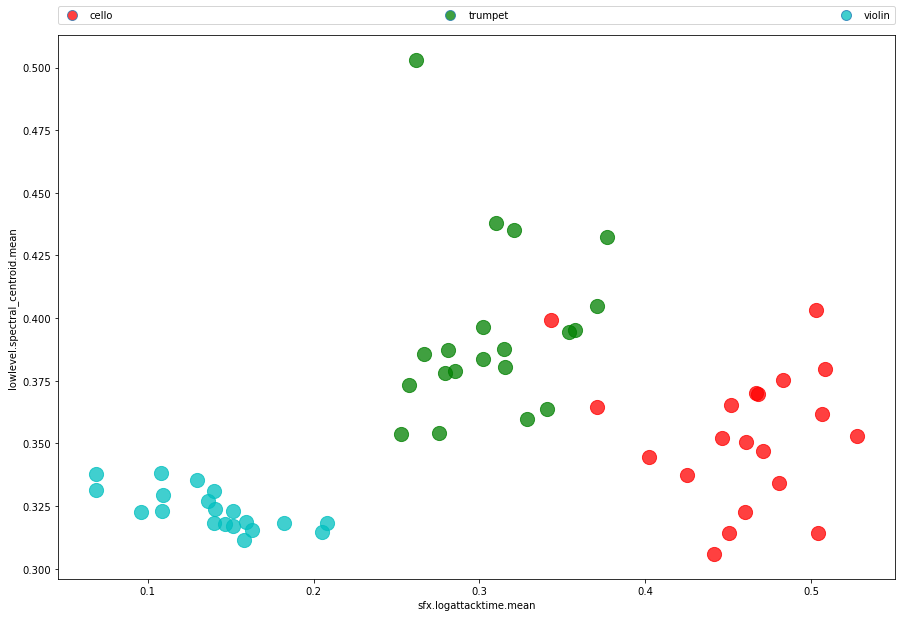

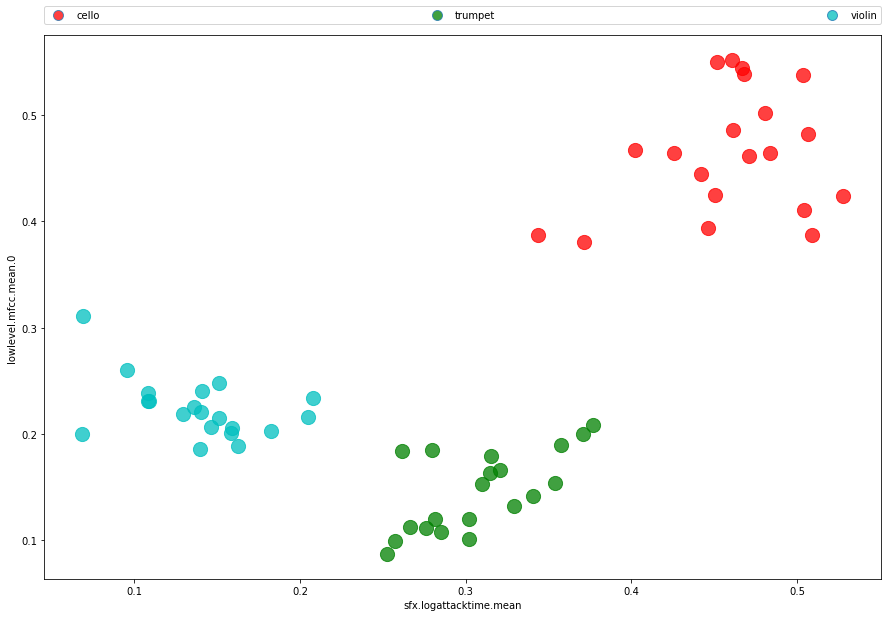

In [6]:
# código para seleccionar los descriptores a trazar
## Cambie las letras xx con valores correctos como el ejemplo a continuación
### inputDir = "./testDownload/
inputDir = './testDownload'

### esta es la línea principal a modificar, seleccione dos descriptores, cambie el XX por un número del 0 al 16

### descInput = (5,6)
# descInput = (2, 10)
# descInput = (4, 12)
# descInput = (6,12)
# descInput = (11, 12)
# descInput = (12, 14)
# descInput = (12, 15)
# descInput = (13, 16)

# Escogemos los siguientes pares de descriptores
# descInput = (3, 0)
# descInput = (3, 11)
# de la siguiente manera
for t in [0, 11]:
    descInput = (3, t)
    # no es necesario cambiar el código desde aquí
    anotOn = 0
    dataDetails = fetchDataDetails(inputDir)
    colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

    plt.figure(figsize=(15, 10))

    legArray = []
    catArray = []
    for ii, category in enumerate(dataDetails.keys()):
        catArray.append(category)
        for soundId in dataDetails[category].keys():
            filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
            descSound = convFtrDict2List(json.load(open(filepath, 'r')))
            x_cord = descSound[descInput[0]]
            y_cord = descSound[descInput[1]]
            plt.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
            if anotOn==1:
                plt.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
        circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
        legArray.append(circ)

    plt.ylabel(descriptorMapping[descInput[1]])
    plt.xlabel(descriptorMapping[descInput[0]])
    plt.legend(legArray,catArray,numpoints=1,bbox_to_anchor=(0.,1.02,1.,.102),loc=3,ncol=len(catArray),mode="expand",borderaxespad=0.)


## Explicacion de la seleccion de descriptores

Para esta parte escogimos los siguientes conjuntos de descriptores que hacen mejor la afrupacion:
 3: 'sfx.logattacktime.mean' y el 0: 'lowlevel.spectral_centroid.mean',
 3: 'sfx.logattacktime.mean' y el 11: 'lowlevel.mfcc.mean.0',

Caracteristicas Temporales de los sonidos
Como los sonidos seleccionads son trompeta, violin y cello tiene sentido que la media dek tiempo ea una característica realmente descriptiva del sonido, ya que el sonido de un violin es más largo que el de una trompeta y un cello. Entre cello y trompeta es mas rapido la trompeta.

Caracteristicas Espectrales de los sonidos
El spectral_centroid indica "centro de masa" de la frecuencia, como explica la documentación de essentia:https://essentia.upf.edu/reference/streaming_Centroid.html del primer grafico podemos ver que la trompeta tiene un spectral_centroid promedio más alto que el resto de los instrumentos, pero también tiene la distribución más separada. seguidamente el violin tiene un centroide espectral promedio más alto que el cello y este tiene el centroide espectral promedio más bajo. Esto tiene sentido ya que el sonido pulsado tiene menos energía en las frecuencias más altas. Ademas el cello tambien tiene una distribucion mas pequeña.

lowlevel.mfcc.mean.0 en el segundo grafico indica la media de energía distribuida en las bandas Mel. Esta es una gran representación del timbre ya que usa la escala de mel como un complemento perceptivo para describir el sonido.

CONCLUSION
Si comparamos ambas distribuciones, es claro que el descriptor MFCC en segundo grafico tiene una varianza reducida para los 3 grupos de instrumentos ademas es la que no presenta sonidos atipicos como en el grafico 1, por lo qu los descriptores elegidos serán:
 3: 'sfx.logattacktime.mean' y el 11: 'lowlevel.mfcc.mean.0',

## Parte 3: Sonidos de racimo usando k-means

Después de visualizar los descriptores de sonido, ahora agrupará los sonidos usando más de dos descriptores. Puede usar tantos descriptores como necesite para obtener el mejor agrupamiento. Use el mismo conjunto de sonidos que obtuvo en la Tarea 1, comenzando con los descriptores que encontró que eran buenos en la Parte 2, y luego agregue otros descriptores que crea que pueden mejorar la agrupación de sonidos de ksignifica. La función `cluster_sounds()` toma como entrada la carpeta de sonidos (targetDir), el número de grupos (nCluster) y los índices del descriptor (descInput). Luego realiza un agrupamiento de kmans utilizando los descriptores seleccionados. Asegúrate de que en targetDir solo tienes los 3 instrumentos elegidos.

Para esta parte, puede usar tantos descriptores como necesite para lograr un buen rendimiento de agrupación y clasificación. Sin embargo, es mejor usar la menor cantidad posible de descriptores para que sea más fácil explicar la contribución de cada descriptor. Elija el número de grupos para que sea el mismo que el número de instrumentos (es decir, 3). Idealmente, en tal caso, todos los sonidos de un instrumento deberían ir en un solo grupo. Sin embargo, en realidad, puede haber sonidos que son atípicos y pueden ir a un grupo diferente. El algoritmo toma un voto mayoritario sobre los sonidos en cada uno de los tres grupos y asigna cada grupo a un instrumento. Calculamos el rendimiento de la agrupación comprobando la cantidad de puntos (sonidos) que se han asignado incorrectamente a una agrupación. La función clusterSounds() imprime los clusters y los sonidos asignados a cada uno. La función también imprime la clasificación resultante obtenida con la elección de descriptores que realizó.

Escriba un breve párrafo que explique los descriptores que usó, la precisión de clasificación resultante que obtuvo y sus observaciones sobre por qué obtuvo (o no) esos errores en la agrupación. Comente si ve algún error sistemático (como una mezcla constante de sonidos de dos instrumentos) y las posibles razones para ello. También debe intentar agrupar con diferentes subconjuntos de descriptores y mencionar la precisión de clasificación que obtiene en cada caso.

Nota: Dado que los centros de conglomerados se inicializan aleatoriamente cada vez en k-means, es posible que vea resultados diferentes cada vez que ejecute la función. Puedes reportar el mejor resultado que obtuviste.

In [7]:
def cluster_sounds(targetDir, nCluster = -1, descInput=[]):
  """
  Esta función agrupa todos los sonidos en targetDir utilizando la agrupación de kmeans.
  
  Aporte:
    targetDir (cadena): Directorio donde se almacenan los descriptores de sonido (todos los sonidos en este
                        directorio se utilizará para la agrupación)
    nCluster (int): número de clústeres que se utilizarán para el agrupamiento de kmeans.
    descInput (lista) : Lista de índices de los descriptores que se utilizarán para similitud/distancia
                       cálculo (ver descriptorMapping)
  Producción:
    Imprime la clase de cada grupo (computado por un voto mayoritario), número de sonidos en cada
    grupo e información (id de sonido, clase de sonido y decisión de clasificación) de los sonidos
    en cada racimo. Opcionalmente, puede descomentar la declaración de devolución para devolver los mismos datos.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  ftrArr = []
  infoArr = []
  
  if nCluster ==-1:
    nCluster = len(dataDetails.keys())
  for cname in dataDetails.keys():
    #iterating over sounds
    for sname in dataDetails[cname].keys():
      ftrArr.append(convFtrDict2List(dataDetails[cname][sname]['feature'])[descInput])
      infoArr.append([sname, cname])
  
  ftrArr = np.array(ftrArr)
  infoArr = np.array(infoArr)
  
  ftrArrWhite = whiten(ftrArr)
  centroids, distortion = kmeans(ftrArrWhite, nCluster)
  clusResults = -1*np.ones(ftrArrWhite.shape[0])
  
  for ii in range(ftrArrWhite.shape[0]):
    diff = centroids - ftrArrWhite[ii,:]
    diff = np.sum(np.power(diff,2), axis = 1)
    indMin = np.argmin(diff)
    clusResults[ii] = indMin
  
  ClusterOut = []
  classCluster = []
  globalDecisions = []  
  for ii in range(nCluster):
    ind = np.where(clusResults==ii)[0]
    freqCnt = []
    for elem in infoArr[ind,1]:
      freqCnt.append(infoArr[ind,1].tolist().count(elem))
    indMax = np.argmax(freqCnt)
    classCluster.append(infoArr[ind,1][indMax])
    
    print("\n(Cluster: " + str(ii) + ") Usando la votación mayoritaria como criterio, este clúster pertenece " + 
          "clase: " + classCluster[-1])
    print ("El número de sonidos en este grupo es: " + str(len(ind)))
    decisions = []
    for jj in ind:
        if infoArr[jj,1] == classCluster[-1]:
            decisions.append(1)
        else:
            decisions.append(0)
    globalDecisions.extend(decisions)
    print ("identificación de sonido, clase de sonido, decisión de clasificación")
    ClusterOut.append(np.hstack((infoArr[ind],np.array([decisions]).T)))
    print (ClusterOut[-1])
  globalDecisions = np.array(globalDecisions)
  totalSounds = len(globalDecisions)
  nIncorrectClassified = len(np.where(globalDecisions==0)[0])
  print("De %d sonidos, %d sonidos están clasificados incorrectamente considerando que un grupo debería"
        "idealmente contienen sonidos de una sola clase"%(totalSounds, nIncorrectClassified))
  print("Obtienes una precisión de clasificación (basada en clusters obtenidos y votación mayoritaria)"
         "de %.2f porcentaje"%round(float(100.0*float(totalSounds-nIncorrectClassified)/totalSounds),2))
  # return ClusterOut

In [8]:
# ejecutar la función clusterSounds
## Cambie las letras xx con los valores correctos como ejemplo a continuación
### targetDir='./testDownload'
### nCluster = 3
### descInput = [0, 3, 11]
### tu código aquí
cluster_sounds(targetDir='./testDownload', 
               nCluster = 3, 
               descInput=[0, 3, 11])


(Cluster: 0) Usando la votación mayoritaria como criterio, este clúster pertenece clase: violin
El número de sonidos en este grupo es: 20
identificación de sonido, clase de sonido, decisión de clasificación
[['55956' 'violin' '1']
 ['55958' 'violin' '1']
 ['55960' 'violin' '1']
 ['55962' 'violin' '1']
 ['55963' 'violin' '1']
 ['55964' 'violin' '1']
 ['55966' 'violin' '1']
 ['55967' 'violin' '1']
 ['55971' 'violin' '1']
 ['55974' 'violin' '1']
 ['55976' 'violin' '1']
 ['55980' 'violin' '1']
 ['55982' 'violin' '1']
 ['55985' 'violin' '1']
 ['55997' 'violin' '1']
 ['56007' 'violin' '1']
 ['56009' 'violin' '1']
 ['56012' 'violin' '1']
 ['56015' 'violin' '1']
 ['56028' 'violin' '1']]

(Cluster: 1) Usando la votación mayoritaria como criterio, este clúster pertenece clase: trumpet
El número de sonidos en este grupo es: 20
identificación de sonido, clase de sonido, decisión de clasificación
[['374061' 'trumpet' '1']
 ['374063' 'trumpet' '1']
 ['374066' 'trumpet' '1']
 ['374067' 'trumpet' '1'

In [9]:
# ejecutar la función clusterSounds
## Cambie las letras xx con los valores correctos como ejemplo a continuación
### targetDir='./testDownload'
### nCluster = 3
### descInput = [0, 3]
### tu código aquí
cluster_sounds(targetDir='./testDownload', 
               nCluster = 3, 
               descInput=[0, 3])


(Cluster: 0) Usando la votación mayoritaria como criterio, este clúster pertenece clase: violin
El número de sonidos en este grupo es: 20
identificación de sonido, clase de sonido, decisión de clasificación
[['55956' 'violin' '1']
 ['55958' 'violin' '1']
 ['55960' 'violin' '1']
 ['55962' 'violin' '1']
 ['55963' 'violin' '1']
 ['55964' 'violin' '1']
 ['55966' 'violin' '1']
 ['55967' 'violin' '1']
 ['55971' 'violin' '1']
 ['55974' 'violin' '1']
 ['55976' 'violin' '1']
 ['55980' 'violin' '1']
 ['55982' 'violin' '1']
 ['55985' 'violin' '1']
 ['55997' 'violin' '1']
 ['56007' 'violin' '1']
 ['56009' 'violin' '1']
 ['56012' 'violin' '1']
 ['56015' 'violin' '1']
 ['56028' 'violin' '1']]

(Cluster: 1) Usando la votación mayoritaria como criterio, este clúster pertenece clase: cello
El número de sonidos en este grupo es: 19
identificación de sonido, clase de sonido, decisión de clasificación
[['357918' 'cello' '1']
 ['357926' 'cello' '1']
 ['357934' 'cello' '1']
 ['357959' 'cello' '1']
 ['35796

Escriba un breve párrafo que explique los descriptores que usó, la precisión de clasificación resultante que obtuvo y sus observaciones sobre por qué obtuvo (o no) esos errores en la agrupación. Comente si ve algún error sistemático (como una mezcla constante de sonidos de dos instrumentos) y las posibles razones para ello. También debe intentar agrupar con diferentes subconjuntos de descriptores y mencionar la precisión de clasificación que obtiene en cada caso.

## Explicacion de la descripcion
En la primera ejecucion usamos los los descriptores descInput = [0, 3, 11] obtenidos de la segunda parte, la presicion de clasificacion resultante obtenida fue del 100% no se obtuvo errores en la agrupacion porque esto descriptores fieron los mejores obtenidos de la parte 2 ya que no tenian ni un sonido atipo o errado en su distribucion el primer claster fue del violin, el segundo de la trompeta y el tercero del cello de acuerdo a sus caracteristicas temporales y espectrales de los sonidos

En la En la primera ejecucion usamos los los descriptores descInput = [0, 3]  la presicion de clasificacion resultante obtenida fue del 98.33% y en este caso si se obtuvo errores en la agrupacion, en el claster 1 que pertenece a la clase cello solo identifica 19 sonidos de 20 y en el claster 2 que pertenece a la clase trompeta identifica 21 sonidos de 20 esto es debido a que existe un sonido atipico que se conidero como trompeta en vez de comsiderarse como cello.

## Parte 4: Clasificar sonidos con k-NN

Asigne un sonido diferente de los sonidos de los 3 instrumentos elegidos a una de las 3 clases instrumentales que eligió en la Parte 1, utilizando el clasificador de k-vecinos más cercanos (k-NN).

Dado un nuevo sonido (sonido de consulta) y sus descriptores, use la función `classify_sound_kNN()` para hacer una clasificación k-NN. Utiliza una medida de distancia basada en la distancia euclidiana que se implementa en `compute_similar_sounds()`. `classify_sound_kNN()` devuelve la clase de instrumento en la que se clasifica el sonido de consulta.

El objetivo del ejercicio es experimentar con el clasificador k-NN y poder comprender el resultado al poder explicar por qué un sonido de consulta en particular, que no pertenece a ninguna de las clases definidas, se clasifica en una de esas clases. . .

4.1 Obtener sonidos de consulta de Freesound. Para obtener los sonidos de consulta y sus descriptores, puede usar la función `download_sounds_freesound()` usando diferentes textos de consulta (como lo hizo en la Parte 1). Obtén sonidos que no sean de los 3 instrumentos que elegiste en la Parte 1, o al menos ninguno de los sonidos que usaste para definir las clases. Si usa un sonido de uno de los tres instrumentos, asegúrese de que sea lo suficientemente diferente de los sonidos existentes en sus colecciones.

4.2 Realizar 5 clasificaciones. Puede usar tantos descriptores como necesite (cuantos menos use, más fácil será explicar el resultado). k generalmente se elige como un número entero positivo impar. Pruebe con diferentes sonidos de consulta, diferentes subconjuntos de descriptores y diferentes valores de k. Explique la razón por la que eligió los descriptores que utilizó y el valor de k que seleccionó. Incluya casos en los que crea que la clasificación es incorrecta y casos con un sonido de consulta de un instrumento diferente de las clases iniciales. Al probar un sonido de un instrumento diferente, está clasificando el sonido en la clase de instrumento más cercana, lo que puede informarle sobre la similitud entre los instrumentos.

In [10]:
def compute_similar_sounds(queryFile, targetDir, descInput = []):
  """
  Esta función devuelve sonidos similares para un archivo de consulta específico. Dado un queryFile esta función
  calcula la distancia de la consulta a todos los sonidos encontrados en targetDir y los ordena en
  el orden creciente de la distancia. De esta forma podemos obtener sonidos similares a un sonido de consulta.
  
  Aporte:
    queryFile (cadena): archivo descriptor (.json, a menos que se cambie)
    targetDir (cadena): directorio de destino para buscar sonidos similares (usando sus archivos descriptores)
    descInput (lista): lista de índices de los descriptores que se utilizarán para el cálculo de similitud/distancia
                       (ver descriptorMapping)
  Producción:
    Lista que contiene una lista ordenada de sonidos similares.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  #reading query feature dictionary
  qFtr = json.load(open(queryFile, 'r'))
  dist = []
  # Iterating over classes
  for cname in dataDetails.keys():
    # Iterating over sounds
    for sname in dataDetails[cname].keys():
      f1 =  convFtrDict2List(qFtr)
      f2 =  convFtrDict2List(dataDetails[cname][sname]['feature'])
      eucDist = np.sqrt(np.sum(np.power(np.array(f1[descInput]) - np.array(f2[descInput]), 2)))
      dist.append([eucDist, sname, cname])
  
  # Sorting the array based on the distance
  indSort = np.argsort(np.array(dist)[:,0])
  return (np.array(dist)[indSort,:]).tolist()

        
def classify_sound_kNN(queryFile, targetDir, K, descInput = []):
  """
  Esta función realiza la clasificación KNN de un sonido. Los vecinos más cercanos se eligen de
  los sonidos en targetDir.
   
  Entrada:
    queryFile (cadena) - descriptor de archivo (.json, a menos que se cambie)
    targetDir (cadena): directorio de destino para buscar sonidos similares (usando sus archivos descriptores)
    K (int) : Número de vecinos más cercanos a considerar para la clasificación KNN.
    descInput (lista) : Lista de índices descriptores que se utilizarán para el cálculo de similitud/distancia
                      (ver descriptorMapping)
  Salida:
    predClass (cadena) - Clase predicha del sonido de consulta
  """
  distances = compute_similar_sounds(queryFile, targetDir, descInput)
  if len(np.where((np.array(distances)[:,0].astype(np.float64))==0)[0])>0:
    print("Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification.")
  
  classes = (np.array(distances)[:K,2]).tolist()
  freqCnt = []
  for ii in range(K):
    freqCnt.append(classes.count(classes[ii]))
  indMax = np.argmax(freqCnt)
  predClass =  classes[indMax]
  print ("Esta muestra pertenece a la clase: " + str(predClass))
  return predClass


In [12]:
# 4.1 descarga un sonido
## Descarga un sonido y descriptor (cambia las letras xx)
### salidaDir='./unSonido'
### topNResults=20
### tu código aquí
"""
Ubicaré el nuevo sonido en una nueva carpeta llamada oneSound, de modo que cuando la distancia euclidiana entre
esta nueva muestra y las muestras de prueba se calculan, no recibimos la advertencia con respecto a una distancia 0 cuando
el nuevo sonido se compara consigo mismo.
"""
download_sounds_freesound(
    queryText = "pluck",
    tag="e-flat%20tag:percussion",
    duration=(0,1),
    API_Key = '7nCLWEwrGhwsjWbZ0wDrAnMMCeyUwM7bj128cX3s',
    outputDir = './oneSound',
    topNResults = 1,
    featureExt = '.json')


In [13]:
import IPython.display as ipd
ipd.display(ipd.Audio('./oneSound/pluck/86328/86328_14771-lq.mp3'))
classify_sound_kNN('./oneSound/pluck/86328/86328_14771-lq.json', 'testDownload', 11, descInput = [3, 11])

Esta muestra pertenece a la clase: violin


'violin'

In [15]:
# 4.2 clasificar el sonido descargado
## Cambiar las letras xx
### archivo de consulta = './oneSound/ukelele/426881/426881_8244073-lq.json'
### targetDir="./testDownload"
### descInput = [3, 11]
### tu código aquí
lista_similar_sound = compute_similar_sounds(queryFile='./oneSound/pluck/86328/86328_14771-lq.json', 
                                             targetDir='./testDownload',
                                             descInput = [3, 11])
#print(lista_similar_sonido)
#print('-'*30)

## Cambiar las letras xx
### archivo de consulta = './oneSound/ukelele/426881/426881_8244073-lq.json'
### targetDir="./testDownload"
### k = 11
### descEntrada = [1, 5]
### tu código aquí
print('Clasificación de sonido con k-NN')
texto_clasification = classify_sound_kNN(queryFile='./oneSound/pluck/86328/86328_14771-lq.json', 
                                         targetDir='./testDownload', 
                                         K=11, 
                                         descInput = [3, 11])
print(texto_clasification)

### explain the classification

Clasificación de sonido con k-NN
Esta muestra pertenece a la clase: violin
violin


In [16]:
# 4.2 clasificar el sonido descargado
## Cambiar las letras xx
### archivo de consulta = './oneSound/ukelele/426881/426881_8244073-lq.json'
### targetDir="./testDownload"
### descInput = [3, 0]
### tu código aquí
lista_similar_sound = compute_similar_sounds(queryFile='./oneSound/pluck/86328/86328_14771-lq.json', 
                                             targetDir='./testDownload',
                                             descInput = [3, 0])
#print(lista_similar_sonido)
#print('-'*30)

## Cambiar las letras xx
### archivo de consulta = './oneSound/ukelele/426881/426881_8244073-lq.json'
### targetDir="./testDownload"
### k = 11
### descEntrada =[3, 0]
### tu código aquí
print('Clasificación de sonido con k-NN')
texto_clasification = classify_sound_kNN(queryFile='./oneSound/pluck/86328/86328_14771-lq.json', 
                                         targetDir='./testDownload', 
                                         K=11, 
                                         descInput = [3, 0])
print(texto_clasification)

### explain the classification

Clasificación de sonido con k-NN
Esta muestra pertenece a la clase: trumpet
trumpet


## Explicacion de la Descripcion
Como se puede observar que cuando el descriptor de entrada es [3, 11] la clasficacion del sonido usando K-NN es Violin el correcto pero cuando  usamos el descriptor de entrada es [3, 0] la clasficacion del sonido usando K-NN es Trompeta el correcto con lo que podemos concluir que el mejor descriptor es [3,0]